In [30]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [31]:
dataset = 'C:/Users/ngkha/Desktop/DAT301m/MediaPipe/Test/model/keypoint.csv'
model_save_path = 'C:/Users/ngkha/Desktop/DAT301m/MediaPipe/Test/model/keypoint_classifier.hdf5'

# 分類数設定

In [32]:
NUM_CLASSES = 37

# 学習データ読み込み

In [33]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [35]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [37]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [38]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_2 (Dropout)         (None, 42)                0         
                                                                 
 dense_3 (Dense)             (None, 20)                860       
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 37)                407       
                                                                 
Total params: 1477 (5.77 KB)
Trainable params: 1477 (5.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [40]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [41]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/8 [==>...........................] - ETA: 4s - loss: 3.7334 - accuracy: 0.0156
Epoch 1: saving model to C:/Users/ngkha/Desktop/DAT301m/MediaPipe/Test/model\keypoint_classifier.hdf5
8/8 [==============================] - 1s 33ms/step - loss: 3.6996 - accuracy: 0.0121 - val_loss: 3.6216 - val_accuracy: 0.0000e+00
Epoch 2/1000
1/8 [==>...........................] - ETA: 0s - loss: 3.6287 - accuracy: 0.0078
Epoch 2: saving model to C:/Users/ngkha/Desktop/DAT301m/MediaPipe/Test/model\keypoint_classifier.hdf5
8/8 [==============================] - 0s 11ms/step - loss: 3.6338 - accuracy: 0.0141 - val_loss: 3.5468 - val_accuracy: 0.0000e+00
Epoch 3/1000
1/8 [==>...........................] - ETA: 0s - loss: 3.5554 - accuracy: 0.0312
Epoch 3: saving model to C:/Users/ngkha/Desktop/DAT301m/MediaPipe/Test/model\keypoint_classifier.hdf5
8/8 [==============================] - 0s 11ms/step - loss: 3.5584 - accuracy: 0.0303 - val_loss: 3.4855 - val_accuracy: 0.0755


c:\Users\ngkha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 4/1000
1/8 [==>...........................] - ETA: 0s - loss: 3.5120 - accuracy: 0.0781
Epoch 4: saving model to C:/Users/ngkha/Desktop/DAT301m/MediaPipe/Test/model\keypoint_classifier.hdf5
8/8 [==============================] - 0s 10ms/step - loss: 3.4873 - accuracy: 0.0677 - val_loss: 3.4240 - val_accuracy: 0.1692
Epoch 5/1000
1/8 [==>...........................] - ETA: 0s - loss: 3.4649 - accuracy: 0.0781
Epoch 5: saving model to C:/Users/ngkha/Desktop/DAT301m/MediaPipe/Test/model\keypoint_classifier.hdf5
8/8 [==============================] - 0s 10ms/step - loss: 3.4172 - accuracy: 0.0889 - val_loss: 3.3573 - val_accuracy: 0.2054
Epoch 6/1000
1/8 [==>...........................] - ETA: 0s - loss: 3.3855 - accuracy: 0.1094
Epoch 6: saving model to C:/Users/ngkha/Desktop/DAT301m/MediaPipe/Test/model\keypoint_classifier.hdf5
8/8 [==============================] - 0s 10ms/step - loss: 3.3462 - accuracy: 0.1444 - val_loss: 3.2835 - val_accuracy: 0.2054
Epoch 7/1000
1/8 [==>.......

In [42]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

3/3 [==============================] - 0s 8ms/step - loss: 0.3670 - accuracy: 0.9637


In [43]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [44]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 48ms/step
[8.1620055e-06 3.3530668e-07 1.5412641e-13 1.1808500e-12 8.3509058e-22
 8.5354648e-19 5.7831883e-19 8.9271844e-21 3.7417761e-20 3.2784523e-24
 9.9999046e-01 1.1049013e-06 7.2051492e-12 1.1337514e-23 1.1725142e-24
 2.2521917e-21 1.5958661e-23 7.5451556e-24 2.1023095e-22 2.3867793e-20
 7.6971663e-25 2.0931002e-21 4.5695738e-20 1.2732530e-23 5.4660786e-21
 3.0049274e-20 2.3931454e-18 9.1859825e-25 4.1539892e-25 5.8338766e-22
 1.1344051e-22 1.7114825e-21 1.3523147e-21 2.4701906e-22 2.7558739e-23
 4.1805230e-24 7.7056350e-23]
10


# 混同行列

11/11 [==============================] - 0s 2ms/step


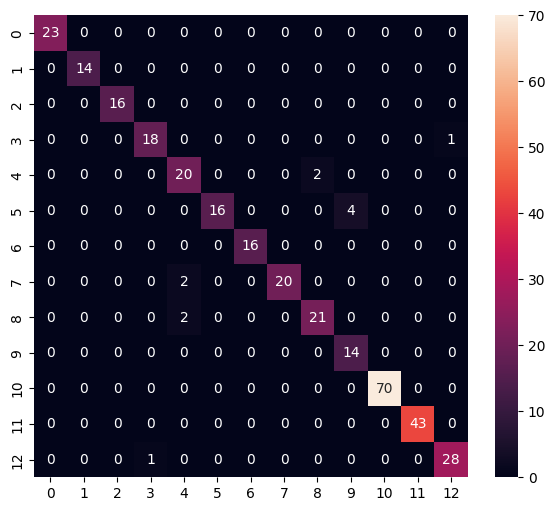

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        16
           3       0.95      0.95      0.95        19
           4       0.83      0.91      0.87        22
           5       1.00      0.80      0.89        20
           6       1.00      1.00      1.00        16
           7       1.00      0.91      0.95        22
           8       0.91      0.91      0.91        23
           9       0.78      1.00      0.88        14
          10       1.00      1.00      1.00        70
          11       1.00      1.00      1.00        43
          12       0.97      0.97      0.97        29

    accuracy                           0.96       331
   macro avg       0.96      0.96      0.95       331
weighted avg       0.97      0.96      0.96       331



In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [46]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

c:\Users\ngkha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [47]:
# モデルを変換(量子化)
tflite_save_path = 'C:/Users/ngkha/Desktop/DAT301m/MediaPipe/Test/model/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\ngkha\AppData\Local\Temp\tmplcqw7ttf\assets


INFO:tensorflow:Assets written to: C:\Users\ngkha\AppData\Local\Temp\tmplcqw7ttf\assets


8024

# 推論テスト

In [48]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [49]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [50]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [51]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [52]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[8.1619664e-06 3.3530569e-07 1.5412731e-13 1.1808547e-12 8.3509694e-22
 8.5354973e-19 5.7832110e-19 8.9272531e-21 3.7418048e-20 3.2784647e-24
 9.9999046e-01 1.1049023e-06 7.2051631e-12 1.1337599e-23 1.1725186e-24
 2.2522004e-21 1.5958719e-23 7.5451548e-24 2.1023095e-22 2.3867791e-20
 7.6971954e-25 2.0931002e-21 4.5695909e-20 1.2732626e-23 5.4660782e-21
 3.0049271e-20 2.3931456e-18 9.1859815e-25 4.1540207e-25 5.8339210e-22
 1.1344137e-22 1.7114825e-21 1.3523146e-21 2.4701997e-22 2.7558843e-23
 4.1805230e-24 7.7056943e-23]
10
